# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)

584

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Creating empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# Setting call counter intital
record = 1


#Looping through the cities in the city list 
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record}, {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
    
    except:
        print("City not found. Skipping...")

Processing Record 1, Kunashak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=kunashak
Processing Record 2, Nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=nome
Processing Record 3, Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=salalah
Processing Record 4, Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=victoria
Processing Record 5, Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=torbay
Processing Record 6, Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=mount gambier
Processing Record 7, Kareli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=kareli
Processing Rec

Processing Record 59, Cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=cairns
Processing Record 60, Berdigestyakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=berdigestyakh
Processing Record 61, Ormond Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=ormond beach
Processing Record 62, Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=namibe
Processing Record 63, Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=ribeira grande
Processing Record 64, Haines Junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=haines junction
Processing Record 65, Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 115, Kiama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=kiama
Processing Record 116, East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=east london
Processing Record 117, Miri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=miri
Processing Record 118, Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=port macquarie
Processing Record 119, Sterlibashevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=sterlibashevo
City not found. Skipping...
Processing Record 120, Goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=goderich
Processing Record 121, Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 171, Martinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=martinopolis
Processing Record 172, Miedzyrzecz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=miedzyrzecz
City not found. Skipping...
Processing Record 173, Sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=sangar
Processing Record 174, Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=hithadhoo
Processing Record 175, Tournon-sur-Rhone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=tournon-sur-rhone
Processing Record 176, Mitchell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=mitchell
Processing Record 177, Puerto El Triunfo
http://api.openweathermap.org/data/2.

Processing Record 228, Avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=avera
Processing Record 229, Yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=yerbogachen
Processing Record 230, Colares
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=colares
City not found. Skipping...
Processing Record 231, Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=meulaboh
Processing Record 232, Andros Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=andros town
Processing Record 233, Acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=acapulco
Processing Record 234, Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing Record 285, Shouguang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=shouguang
Processing Record 286, Never
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=never
Processing Record 287, Powell River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=powell river
City not found. Skipping...
Processing Record 288, Nadterechnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=nadterechnoye
Processing Record 289, Axim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=axim
Processing Record 290, Boende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=boende
Processing Record 291, Jilin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752

Processing Record 342, Jumla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=jumla
Processing Record 343, Oerlinghausen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=oerlinghausen
Processing Record 344, Merauke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=merauke
Processing Record 345, Williston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=williston
Processing Record 346, Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=isangel
Processing Record 347, Kita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=kita
Processing Record 348, Rio Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=rio g

Processing Record 400, Neenah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=neenah
Processing Record 401, Nagamangala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=nagamangala
Processing Record 402, Zelenoborsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=zelenoborsk
Processing Record 403, Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=los llanos de aridane
Processing Record 404, Luganville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=luganville
Processing Record 405, Utena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=utena
City not found. Skipping...
Processing Record 406, Allen
http://api.openweathermap.org/data/2.5/weather?

Processing Record 457, Marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=marawi
Processing Record 458, Hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=hofn
Processing Record 459, Cap Malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=cap malheureux
Processing Record 460, Turbat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=turbat
Processing Record 461, Husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=husavik
Processing Record 462, Batagay-Alyta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=batagay-alyta
Processing Record 463, Merrill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&

Processing Record 514, Jiayuguan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=jiayuguan
Processing Record 515, Muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=muros
Processing Record 516, Gravelbourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=gravelbourg
City not found. Skipping...
Processing Record 517, Nagua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=nagua
Processing Record 518, Ust-Kuyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=ust-kuyga
Processing Record 519, Puerto Escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3014c6752eaed12b51d5d453d319248f&q=puerto escondido
Processing Record 520, Suileng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

In [10]:
# Creating a dictonary with the list generated
weather_info = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}


# Forming the dataframe from the created dictionary
weather_data = pd.DataFrame(weather_info)

weather_data.to_csv('weather_data_output.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kunashak,0,RU,1558563669,49,55.70,61.55,48.2,6.71
1,Nome,90,US,1558563201,74,30.04,-94.42,86.0,13.87
2,Salalah,20,OM,1558563400,83,17.01,54.10,84.2,2.24
3,Victoria,75,BN,1558563226,88,5.28,115.24,80.6,2.24
4,Torbay,90,CA,1558563441,100,47.66,-52.73,36.0,24.16


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

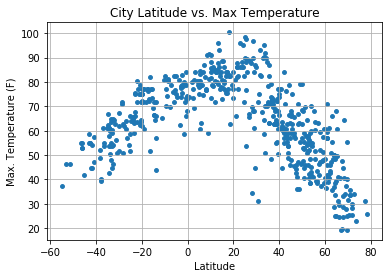

In [17]:
# Plotting data in scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=15)


# Creating plot properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()


# Saving the figure
plt.savefig("Max_Temp_vs_Latitude.png")


# Show plot
plt.show()

#### Latitude vs. Humidity Plot

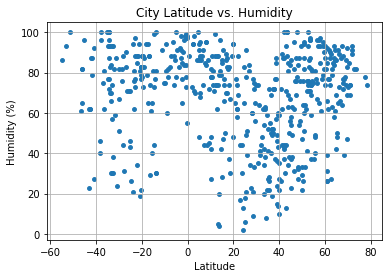

In [18]:
# Plotting data in scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=15)


# Creating plot properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()


# Saving the figure
plt.savefig("Humidity_vs_Latitude.png")


# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

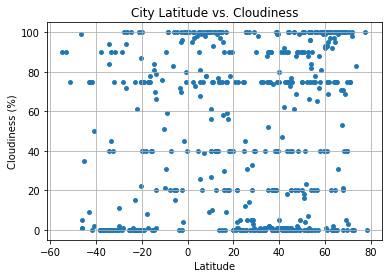

In [19]:
# Plotting data in scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=15)


# Creating plot properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()


# Saving the figure
plt.savefig("Cloudiness_vs_Latitude.png")


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

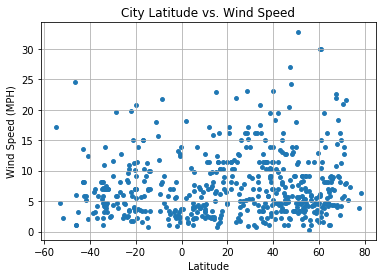

In [21]:
# Plotting data in scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=15)


# Creating plot properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid()


# Saving the figure
plt.savefig("Wind_Speed_vs_Latitude.png")


# Show plot
plt.show()